<a href="https://colab.research.google.com/github/jgtolentino/MMM_KOL/blob/main/MMM_KOL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

,KOL_Engagement,Social_Media_Ads,Email_Campaigns,Other_Channels,Sales
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,120.527112,299.132689,61.408106,99.114894,202.316397
std,44.623412,117.244501,23.474100,29.345222,41.208348
min,50.828318,102.780852,20.404927,51.439349,81.828862
25%,78.980114,196.801811,42.150389,74.961492,170.299873
50%,119.621368,302.249943,65.004395,100.971830,208.863527
75%,159.530468,406.473439,80.189355,123.577751,232.647603
max,198.033040,494.260182,99.204308,149.050514,292.448826


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     470.4
Date:                Tue, 05 Nov 2024   Prob (F-statistic):           1.12e-61
Time:                        12:52:07   Log-Likelihood:                -361.49
No. Observations:                 100   AIC:                             733.0
Df Residuals:                      95   BIC:                             746.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9283      6.543  

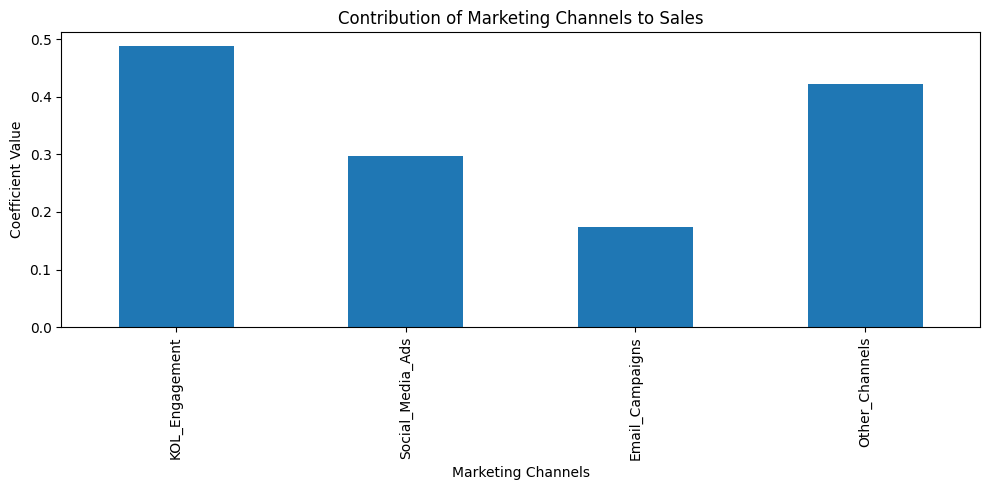

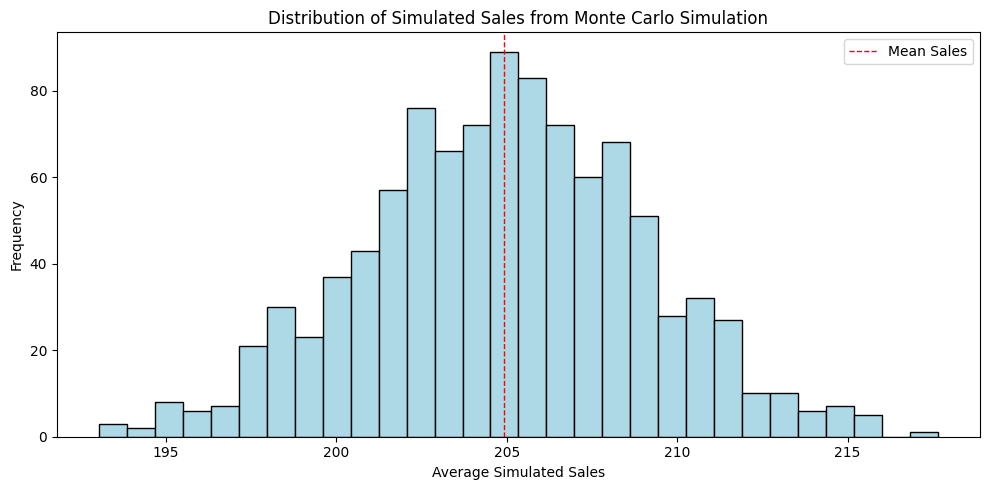

In [6]:
# Open In Colab

# Import necessary libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# CRISP-DM Methodology Overview
display(HTML("""
<h2>CRISP-DM Methodology for Marketing Analysis</h2>
<p>This notebook follows the CRISP-DM framework to analyze the effectiveness of marketing channels on sales, focusing on actionable insights.</p>
<ul>
    <li><strong>Business Understanding:</strong> Define objectives and goals.</li>
    <li><strong>Data Understanding:</strong> Collect and explore data.</li>
    <li><strong>Data Preparation:</strong> Clean and preprocess data.</li>
    <li><strong>Modeling:</strong> Build a regression model.</li>
    <li><strong>Evaluation:</strong> Assess model performance.</li>
    <li><strong>Deployment:</strong> Generate insights and provide recommendations.</li>
</ul>
"""))

# Step 1: Business Understanding
# Objective: Analyze the impact of marketing channels on sales and optimize marketing spend.

# Step 2: Data Understanding
# Generating simulated data
np.random.seed(42)
n = 100  # Number of observations

kol_engagement = np.random.uniform(50, 200, n)
social_media_ads = np.random.uniform(100, 500, n)
email_campaigns = np.random.uniform(20, 100, n)
other_channels = np.random.uniform(50, 150, n)

# Creating a dependent variable (sales) influenced by all channels with random noise
sales = (
    0.5 * kol_engagement +
    0.3 * social_media_ads +
    0.2 * email_campaigns +
    0.4 * other_channels +
    np.random.normal(0, 10, n)
)

# Creating a DataFrame
data = pd.DataFrame({
    'KOL_Engagement': kol_engagement,
    'Social_Media_Ads': social_media_ads,
    'Email_Campaigns': email_campaigns,
    'Other_Channels': other_channels,
    'Sales': sales
})

# Step 3: Data Preparation
# Preparing the data for the regression model
X = data[['KOL_Engagement', 'Social_Media_Ads', 'Email_Campaigns', 'Other_Channels']]
X = sm.add_constant(X)  # Adding a constant for the intercept
y = data['Sales']

# Data Validation: Checking for null values and basic statistics
if data.isnull().any().any():
    display(HTML("<h4>Data Validation Warning:</h4><p>Data contains null values.</p>"))
else:
    display(HTML("<h4>Data Validation:</h4><p>No null values found in the data.</p>"))

# Displaying basic statistics
display(HTML("<h4>Basic Statistics:</h4>"))
display(data.describe())

# Step 4: Modeling
# Building the regression model
model = sm.OLS(y, X).fit()

# Displaying the model summary
display(HTML("<h3>Model Summary</h3>"))
print(model.summary())

# Step 5: Evaluation
# Evaluating the model performance using R-squared and RMSE
predictions = model.predict(X)
residuals = y - predictions
rmse = np.sqrt(np.mean(residuals**2))

# Calculating the contribution rate for KOL Engagement
total_conversion_rate = model.params['const'] + (
    model.params['KOL_Engagement'] * 100 +
    model.params['Social_Media_Ads'] * 150 +
    model.params['Email_Campaigns'] * 50 +
    model.params['Other_Channels'] * 75
)

kol_conversion_rate = model.params['KOL_Engagement'] * 100
kol_rate_percentage = (kol_conversion_rate / total_conversion_rate) * 100

# Displaying the percentage contribution of KOL Engagement
display(HTML(f"""
<h3>KOL Engagement Contribution Rate</h3>
<p>KOL Engagement contributes approximately {kol_rate_percentage:.2f}% to the total estimated conversion rate, highlighting its significant role in driving conversions.</p>
<p>Model Evaluation Metrics:</p>
<ul>
    <li>R-squared: {model.rsquared:.4f}</li>
    <li>Root Mean Squared Error (RMSE): {rmse:.4f}</li>
</ul>
"""))

# Step 6: Deployment
# Visualizing the contribution of each channel to sales
coefficients = model.params[1:]  # Exclude the constant
coefficients.plot(kind='bar', title='Contribution of Marketing Channels to Sales', figsize=(10, 5))
plt.ylabel('Coefficient Value')
plt.xlabel('Marketing Channels')
plt.tight_layout()
plt.show()

# Monte Carlo Simulation for sales prediction
num_simulations = 1000
simulated_sales = []

for _ in range(num_simulations):
    simulated_kol = np.random.uniform(50, 200, n)
    simulated_social = np.random.uniform(100, 500, n)
    simulated_email = np.random.uniform(20, 100, n)
    simulated_other = np.random.uniform(50, 150, n)

    simulated_y = (
        coefficients['KOL_Engagement'] * simulated_kol +
        coefficients['Social_Media_Ads'] * simulated_social +
        coefficients['Email_Campaigns'] * simulated_email +
        coefficients['Other_Channels'] * simulated_other +
        model.params['const']
    )

    simulated_sales.append(np.mean(simulated_y))

# Plotting the distribution of simulated sales
plt.figure(figsize=(10, 5))
plt.hist(simulated_sales, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Simulated Sales from Monte Carlo Simulation')
plt.xlabel('Average Simulated Sales')
plt.ylabel('Frequency')
plt.axvline(np.mean(simulated_sales), color='red', linestyle='dashed', linewidth=1, label='Mean Sales')
plt.legend()
plt.tight_layout()
plt.show()

# Monte Carlo Simulation Discussion
display(HTML("""
<h3>Monte Carlo Simulation Discussion</h3>
<p>The Monte Carlo simulation shows the distribution of average sales across 1,000 simulated scenarios, providing insights into potential variability in sales outcomes. This helps in preparing for different market conditions and supports better strategic planning.</p>
<p>Actionable Insights from the Simulation:</p>
<ul>
    <li>Anticipate fluctuations in sales, allowing for better inventory and resource management.</li>
    <li>Use simulation results to inform budgeting and forecast marketing spend based on predicted performance.</li>
    <li>Identify potential risks in underperforming channels and adjust strategies accordingly.</li>
</ul>
"""))

# Actionable Recommendations
display(HTML("""
<h3>Actionable Recommendations</h3>
<ul>
    <li><strong>Prioritize High-Impact Channels:</strong> Focus on KOL engagement and social media ads for maximum return.</li>
    <li><strong>Use Predictive Insights:</strong> Leverage model results to plan for different outcomes and mitigate risks.</li>
    <li><strong>Enhance Email Campaigns:</strong> Further optimization can increase their impact.</li>
    <li><strong>Adopt a Dynamic Strategy:</strong> Integrate insights from this analysis with real-time data for continuous improvement.</li>
</ul>
"""))

# Next Steps
display(HTML("""
<h3>Next Steps</h3>
<ul>
    <li><strong>Further Segment Channels:</strong> Analyze the performance of individual channels more granularly to uncover specific strengths and weaknesses.</li>
    <li><strong>Implement A/B Testing:</strong> Conduct A/B tests for email campaigns to identify the most effective strategies through data-driven experimentation.</li>
    <li><strong>Collect Real-World Data:</strong> Validate the model's assumptions and findings by gathering real-world data for analysis.</li>
    <li><strong>Monitor Performance:</strong> Set up a dashboard to track key metrics in real-time and make informed decisions based on live data.</li>
    <li><strong>Iterate on Insights:</strong> Regularly update the model with new data and insights to enhance ongoing optimization efforts.</li>
    <li><strong>Engage Stakeholders:</strong> Present findings and insights to stakeholders to inform strategic decisions and resource allocation.</li>
</ul>
"""))
